### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [1]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'1.14.0'

### Collect Data

In [4]:
import keras

Using TensorFlow backend.


In [5]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [6]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [7]:
trainY=tf.keras.utils.to_categorical(trainY)

In [8]:
testY=tf.keras.utils.to_categorical(testY)

In [9]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

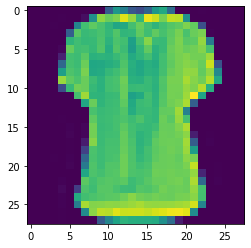

In [10]:
image = trainX[55,:].reshape((28,28))
plt.imshow(image)
plt.show()

C:\Users\SUHAIL\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


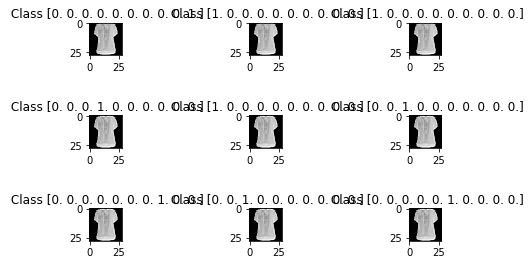

In [26]:
for i, correct in enumerate(range(1,10)):
    #print(i)
    plt.subplot(3,3,i+1)
    plt.imshow(trainX[55,:].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(" Class {}".format(trainY[i] ))
    plt.tight_layout()

In [12]:

# define some hyper parameters 
batch_size = 100 
n_inputs = 784 
n_classes = 10 
n_epochs = 3 

# get the data 
import numpy as np


In [13]:

x_train = trainX.reshape( 60000, n_inputs) 
print(x_train)
x_test = testX.reshape( 10000, n_inputs) 

# convert the input values to float32 
x_train = x_train.astype( np.float32) 
x_test = x_test.astype( np.float32) 

# normalize the values of image vectors to fit under 1 
x_train /= 255 
x_test /= 255 

# convert output data into one hot encoded format 
#y_train = utils.to_categorical( y_train, n_classes) 
#y_test = utils.to_categorical( y_test, n_classes)

y_train = trainY 
y_test = testY



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
import keras 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 
from keras.optimizers import SGD 
from keras import utils 

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [15]:


model = Sequential() # the first layer has to specify the dimensions of the input vector 
model.add( Dense( units = 128, activation ='sigmoid', input_shape =( n_inputs,))) # add dropout layer for preventing overfitting 
model.add( Dropout( 0.1)) 
model.add( Dense( units = 128, activation ='sigmoid')) 
model.add( Dropout( 0.1)) # output layer can only have the neurons equal to the number of outputs 
model.add( Dense( units = n_classes, activation ='softmax')) # print the summary of our model 
model.summary() 

# compile the model 
model.compile( loss ='categorical_crossentropy', optimizer = SGD(), metrics =['accuracy']) 

# train the model 
model.fit( x_train, y_train, batch_size = batch_size, epochs = n_epochs) 

# evaluate the model and print the accuracy score 

scores = model.evaluate( x_test, y_test) 

print('\ n loss:', scores[ 0]) 

print('\ n accuracy:', scores[ 1])

W0829 21:38:48.996961  2600 deprecation_wrapper.py:119] From C:\Users\SUHAIL\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 21:38:49.006961  2600 deprecation_wrapper.py:119] From C:\Users\SUHAIL\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 21:38:49.406962  2600 deprecation_wrapper.py:119] From C:\Users\SUHAIL\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0829 21:38:49.616962  2600 deprecation_wrapper.py:119] From C:\Users\SUHAIL\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0829 21:38:49.676962  2600 deprecation.py

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


W0829 21:38:50.826964  2600 deprecation.py:323] From C:\Users\SUHAIL\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/3
60000/60000 [==============================] - 9s 155us/step - loss: 2.2630 - acc: 0.1625
Epoch 2/3
60000/60000 [==============================] - 5s 82us/step - loss: 2.0772 - acc: 0.2987
Epoch 3/3
10000/10000 [==============================] - 1s 65us/step
\ n loss: 1.6358808246612548
\ n accuracy: 0.5204


### Execute the model using model.fit()

In [16]:
# done above

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [18]:
model = Sequential() # the first layer has to specify the dimensions of the input vector 
keras.layers.Flatten(input_shape=(28, 28)),
model.add( Dense( units = 128, activation ='sigmoid', input_shape =( n_inputs,))) # add dropout layer for preventing overfitting 
model.add( Dropout( 0.1)) 
model.add( Dense( units = 128, activation ='sigmoid')) 
model.add( Dropout( 0.1)) # output layer can only have the neurons equal to the number of outputs 
model.add( Dense( units = n_classes, activation ='softmax')) # print the summary of our model 
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


### Execute the model

In [19]:
# compile the model 
model.compile( loss ='categorical_crossentropy', optimizer = SGD(), metrics =['accuracy']) 

# train the model 
model.fit( x_train, y_train, batch_size = batch_size, epochs = n_epochs) 

# evaluate the model and print the accuracy score 

scores = model.evaluate( x_test, y_test) 

print('\ n loss:', scores[ 0]) 

print('\ n accuracy:', scores[ 1])

Epoch 1/3
60000/60000 [==============================] - 6s 100us/step - loss: 2.2658 - acc: 0.1580
Epoch 2/3
60000/60000 [==============================] - 5s 89us/step - loss: 2.0784 - acc: 0.2999
Epoch 3/3
10000/10000 [==============================] - 1s 68us/step
\ n loss: 1.6109482902526855
\ n accuracy: 0.5701


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [22]:
# compile the model 
model.compile( loss ='categorical_crossentropy', optimizer = SGD(lr=0.001), metrics =['accuracy']) 

# train the model 
model.fit( x_train, y_train, batch_size = batch_size, epochs = n_epochs) 

# evaluate the model and print the accuracy score 

scores = model.evaluate( x_test, y_test) 

print('\ n loss:', scores[ 0]) 

print('\ n accuracy:', scores[ 1])

Epoch 1/3
60000/60000 [==============================] - 7s 119us/step - loss: 1.5885 - acc: 0.5924
Epoch 2/3
60000/60000 [==============================] - 5s 91us/step - loss: 1.5652 - acc: 0.5982
Epoch 3/3
10000/10000 [==============================] - 1s 69us/step
\ n loss: 1.5339753652572632
\ n accuracy: 0.6058


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [23]:
model = Sequential() # the first layer has to specify the dimensions of the input vector 
keras.layers.Flatten(input_shape=(28, 28)),
model.add( Dense( units = 100, activation ='sigmoid', input_shape =( n_inputs,))) # add dropout layer for preventing overfitting 
model.add( Dropout( 0.001)) 
model.add( Dense( units = 100, activation ='sigmoid')) 
model.add( Dropout( 0.001)) # output layer can only have the neurons equal to the number of outputs 
model.add( Dense( units = n_classes, activation ='softmax')) # print the summary of our model 
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
# compile the model 
model.compile( loss ='categorical_crossentropy', optimizer = SGD(lr=0.03), metrics =['accuracy']) 

# train the model 
model.fit( x_train, y_train, batch_size = batch_size, epochs = n_epochs) 

# evaluate the model and print the accuracy score 

scores = model.evaluate( x_test, y_test) 

print('\ n loss:', scores[ 0]) 

print('\ n accuracy:', scores[ 1])

Epoch 1/3
60000/60000 [==============================] - 6s 92us/step - loss: 2.0551 - acc: 0.4051
Epoch 2/3
60000/60000 [==============================] - 4s 71us/step - loss: 1.3746 - acc: 0.5997
Epoch 3/3
10000/10000 [==============================] - 1s 54us/step
\ n loss: 0.9597092010498047
\ n accuracy: 0.6786


## Review model

#The Model with SGD as learning rate = 0.03 gives better accuracy as 67%

### Run the model